# Learning outcomes
1. Load, display and save images
2. Load, show and save videos
3. image resizing

## Why OpenCV?
- Compatible with multiple major OS, like Windows, MacOS, Linux, Written in C++, Python and Java
- Interpreterable with Numpy, thereby facilities fast computation of image arrays
- Large community support, a lot of articles, stackoverflow post regarding OpenCV

## Image formats
- JPEG(.jpg, .jpeg, jfif)
    - photos, smaller file size compared to png 
- PNG (.png)
    - website or file transfer
- tiff (.tif)
    - used for printing (high quality). Large file sixze
- bitmap(.bmp)
    - large file size
- gif (.GIF, OpenCV can't deal with GIF)
    - support animation, shallow color depth
- webp (.webp)
    - used for file transfer, not supported by IE


## Load and show images 

### setup

In [1]:
import sys
#at least Python 3.7
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv

In [2]:
print(cv.__version__)

4.8.0


In [68]:
img = cv.imread("images/lena.jfif")
grayscale = cv.imread("images/lena.jfif", 0)
# second argument: 1(default, read color image), 0(grayscale), -1: unchanged

cv.imshow("lena_color", img)
cv.imshow("lena_grayscale", grayscale)
cv.waitKey(0) # key binding function: wait for user input
cv.destroyAllWindows()

In [69]:
def show_img(window_name, img):
    #2 arguments: window name and image***
    cv.imshow(window_name, img)
    cv.waitKey(0) # key binding function: wait for user input
    cv.destroyAllWindows()

In [70]:
img = cv.imread("images/lena.png")

show_img("image", img)


How about GIF? we need external module

In [3]:
import imageio

In [7]:
# GIF
GIF = imageio.mimread("images/rotating_earth_large.gif")

#convert RGB to BGR 
imgs = [cv.cvtColor(img, cv.COLOR_RGB2BGR) for img in GIF]

for img in imgs:
    cv.imshow("GIF", img)
    cv.waitKey(150)
    
cv.destroyAllWindows()
        
#show_img("GIF", imgs[0])

In [8]:
img_jpeg = cv.imread("images/lena.jpg", -1)


# Save Image

    cv.imwrite(filepath, img)

In [9]:
# formalized way to load, show, and save shape
img = cv.imread(cv.samples.findFile("images/lena.jfif"))

if img is None:
    sys.exit("Not a valid filepath")

cv.imshow("lena", img)
k = cv.waitKey(0) & 0xFF


#if k == 115:
if k == ord('s'): #user have to press 's'
    cv.imwrite("lena_save.jpg", img)
    
cv.destroyAllWindows()    

# video operations with OpenCV

In [10]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No such file")

cv.namedWindow("frame", cv.WINDOW_NORMAL)
    
while True:
    #ret is status， boolean, return true if the frame is available
    #frame is image array vector captured
    ret, frame = cap.read()
    if not ret:
        print("No frame detected")
        break
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    
    if k == 27:
        break
        
cap.release()
cv.destroyAllWindows

No frame detected


<function destroyAllWindows>

In [11]:
img_jpeg = cv.imread("images/lena.jpg", -1)
img_png = cv.imread("images/lena.png", -1)

print(f"The shape of jpeg: {img_jpeg.shape}")
print(f"The shape of png: {img_png.shape}")

AttributeError: 'NoneType' object has no attribute 'shape'

# WebCam
save video captured by webcam

In [13]:
cap = cv.VideoCapture(0)

if not cap.isOpened():
    sys.exit("No webcam")

#parameters filepath, fourcc, fps, frame, width and height
fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")

fps = 15
w, h = int(cap.get(3)), int(cap.get(4))
out = cv.VideoWriter("videos/out.avi", fourcc, fps, (w,h))

while True:
    #ret is status
    #frame is range
    ret, frame = cap.read()
    if not ret:
        print("No frame detected")
        break
        
    out.write(frame)
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    
    if k == 27:
        break
        
cap.release()
out.release()
cv.destroyAllWindows()

In [15]:
import time

cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No such file")

cv.namedWindow("frame", cv.WINDOW_NORMAL)
    
start = time.time()    
while True:
    #ret is status
    #frame is range
    ret, frame = cap.read()
    if not ret:
        print("No frame detected")
        break
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    
    if k == 27:
        break
    
end = time.time()    
# cap.release()
cv.destroyAllWindows

<function destroyAllWindows>

In [16]:
print(f"The fps using the media player: {cap.get(5)}")
total_frame = cap.get(7)
print(f"The fps with OpenCV: {total_frame / (end - start)}")

The fps using the media player: 60.0
The fps with OpenCV: 1077.8042490226867


## resizing

3 methods to perform resizing

1. set arbitrary sizes
2. state factor

In [17]:
# 1 method: set any dimension you prefer
img = cv.imread("images/soccer.jpg")

# arguments: source image, dimension, fx, fy, interpolation methods
new_height = 300
new_width = 450
img_resize = cv.resize(img, (new_width, new_height))

cv.imshow("original", img)
show_img("resize", img_resize)

In [18]:
#aspect ratio = width/ height
#800/1200 = 2/3 original aspect ratio
#300/ 450 = 2/3 resize image aspect ratio
img.shape

(1200, 800, 3)

In [19]:
#2 way: scale factor

img = cv.imread("images/lena.jfif")

img_resize = cv.resize(img, None, fx=1.5, fy=1.5)

cv.imshow("original", img)
show_img("resize", img_resize)

# Question 1

In [20]:
#Exercise 1
dog = cv.imread("images/dog.jfif")

show_img("dog", dog)



In [21]:
# formalized way to load, show, and save shape
img = cv.imread(cv.samples.findFile("images/dog.jfif"))

if img is None:
    sys.exit("Not a valid filepath")

cv.imshow("dog", img)
k = cv.waitKey(0) & 0xFF


#if k == 115:
if k == ord('s'): #user have to press 's'
    cv.imwrite("dog_save.jpg", img)
    
cv.destroyAllWindows() 

# Question 2

In [21]:
## 1 method call cv.imshow() twice

img = cv.imread("images/lena.jfif")
grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("COLOR", img)
show_img("grayscale", grayscale)

In [22]:
## 2 method call matplotlib module
import matplotlib.pyplot as plt

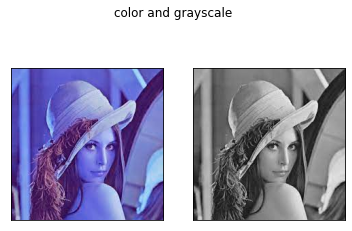

In [27]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(grayscale, cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])
plt.suptitle("color and grayscale")
plt.show()

In [28]:
# 3 method: cv.imshow() or plt

grayscale = cv.cvtColor(grayscale, cv.COLOR_GRAY2BGR)

img_combined = np.hstack((img, grayscale))

show_img("color vs grayscale", img_combined)

## Question 3

In [65]:
vidcap = cv.VideoCapture("videos/img_pexels.mp4")

if not vidcap.isOpened():
    sys.exit("No such file")
    
#cv.namedWindow("frame", cv.WINDOW_NORMAL)
#parameters filepath, fourcc, fps, frame, width and height
fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")

fps = 15
w, h = int(vidcap.get(3)), int(vidcap.get(4))
smallermp4 = cv.VideoWriter("videos/smaller_img_pexels.mp4", fourcc, fps, (w,h))

while True:
    #ret is status， boolean, return true if the frame is available
    #frame is image array vector captured
    ret, frame = vidcap.read()

    frame = cv.resize(frame, (360, 400))

    if not ret:
        print("No frame detected")
        break
    smallermp4.write(frame)
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    
    if k == 27:
        break
    
vidcap.release()
smallermp4.release()
cv.destroyAllWindows

<function destroyAllWindows>

## Question 4

In [79]:
img = cv.imread("images/dog.jfif")

# arguments: source image, dimension, fx, fy, interpolation methods
new_height = 270
new_width = 450
img_resize_linear = cv.resize(img, (new_width, new_height), fx=1, fy=1, interpolation = cv.INTER_LINEAR)
                               
cv.imshow("original", img)
show_img("linear", img_resize_linear)



In [80]:
img_resize_cubic = cv.resize(img, (new_width, new_height), fx=1, fy=1, interpolation = cv.INTER_CUBIC)

show_img("cubic", img_resize_cubic)

In [81]:
img_resize_nearest = cv.resize(img, (new_width, new_height), fx=1, fy=1, interpolation = cv.INTER_NEAREST)

show_img("nearest", img_resize_nearest)

### 1) Linear interpolation

- take four nearest known neighbours (2x2 neighbourhood) of unknown pixels and then take the average of these values to assign the unkwown pixel
- take an approximation of a point between two points by scaling the point according to how close it is to the respective two points.
- for example, (2x2 neighbourhood) extend to (4x4 neighbourhood),
    *ASSUME MIDDLE POINT IS (0.75,0.25)*
               10|20     10|12|17|20
               30|40 --> 15|17|22|25
                         25|27|32|35
                         30|32|37|40
    - for (0,2) to get 12, the calculation is 10*0.75 + 20*0.25 = 7.5 + 5 = 12.5... 
    
###### comment: the picture is more smooter...

### 2) Cubic interpolation

- use 16 pixels around the pixel to be interpolated (4x4 neighbourhood)
- determine the 16 coefficients a(ij) and the multiply them with the weights of the known pixels and interpolate unknown pixels.

###### comment: the picture is more sharper...

### 3) Nearest neighbor interpolation

- find the unknown pixels to be at (-0.5, -0.5), (-0.5, -0.5) and so on...
- compare the values of the known pixels to the values of the nearest unknown pixels, thereafter, assign the nearest value to the nearest unknown pixels
- for example, 10|20     10|10|20|20
               30|40 --> 10|10|20|20
                         30|30|40|40
                         30|30|40|40
                         
###### comment: the picture is smooter than the image enlarged using cubic interpolation and sharper than the image enlarged using linear interpolation...
